# Ising model using python

Pseudo code
```python
for every point in the grid:
    energy = my spin * sum of all of the spins (+1 or -1) of neighboring points
    if energy is improved by switching:
        switch
    else if we're particulalry unlucky
        switch anyway
```

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
def periodicalize(lattice):
    n, m = lattice.shape
    n -= 1
    m -= 1
    
    lattice[:, 0] = lattice[:, m-1]
    lattice[:, m] = lattice[:, 1]
    lattice[0, :] = lattice[n-1, :]
    lattice[n, ] = lattice[1, :]
    # Ecken
    lattice[0, 0] = lattice[0, m] = lattice[n, 0] = lattice[n, m] = 0
    return lattice

In [125]:
# Initialize Random Lattice
def init(n, m=None, random=True, periodic=True):
    if m is None:
        m = n
    if random:
        field = np.random.choice([-1, 1], size=[n, m])  # Random Spins
    else:
        field = np.ones([n, m])
        
    lattice = np.zeros([n+2, m+2])
    lattice[1:n+1, 1:m+1] = field
    
    if periodic:
        return periodicalize(lattice)
    else:
        return field

In [167]:
# Implement Ising Model Steps
def step(old_field):
    n, m = f.shape
    new_field = old_field.copy()
    J = 1
    beta = 1
    
    for i in range(1, n-1):
        for j in range(1, m-1):
            Hamiltonian_old = - J * old_field[i, j] * (  # eigener Spin
                old_field[i-1, j] +  # alle naechsten Nachbarn
                old_field[i+1, j] +
                old_field[i, j-1] +
                old_field[i, j+1]
            )
            Hamiltonian_new = - Hamiltonian_old
            # Change Spin According To Other Spins And Boltzmann
            # TODO: IMPLEMENT ME
            if Hamiltonian_new < Hamiltonian_old:
                new_field[i, j] *= -1
            # if np.exp(- beta * f[i, j]) > np.random.rand():
            #     field[i, j] *= -1
    # print(new_field - old_field)
    return periodicalize(new_field)

In [183]:
# Define Start Values
steps = 10 #+ 10000
n = 4
f = init(n, random=True)

images = [f]

# Run Model, Save Every Step
for i in range(steps):
    images.append(step(images[-1].copy()))

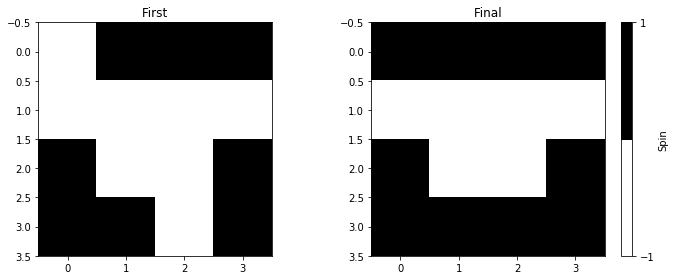

In [184]:
# Display Lattice After MC
first = images[0]
final = images[-1]

fig = plt.figure()
fig.set_size_inches([10, 4])
ax_first = fig.add_subplot(121)
ax_final = fig.add_subplot(122)

cmap = plt.get_cmap('binary', 2)

# im_first = ax_first.imshow(first[1:n+1, 1:n+1], cmap=cmap)
# im_final = ax_final.imshow(final[1:n+1, 1:n+1], cmap=cmap)
im_first = ax_first.imshow(first[1:n+1, 1:n+1], cmap=cmap)
im_final = ax_final.imshow(final[1:n+1, 1:n+1], cmap=cmap)


cbar = fig.colorbar(im_first)
cbar.set_ticks([-1, 1])
cbar.ax.set_ylabel("Spin")

ax_first.set_title("First")
ax_final.set_title("Final")
fig.tight_layout()
fig;